In [1]:
import cv2 as cv
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read student info from excel file and create pandas dataframe
df = pd.read_excel('StudentList.xls') 
print(df)

  First Name Last Name                        School               Degree
0      Malan     Moody  College of Arts and Sciences  Bachelor of Science
1       John      Deer     Beacom School of Business  Bachelor of Science
2       Jane       Doe          College of Fine Arts     Bachelor of Arts


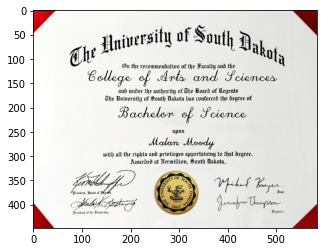

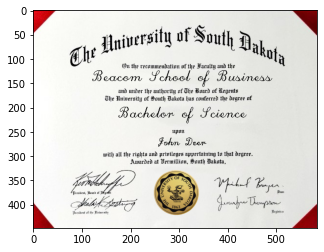

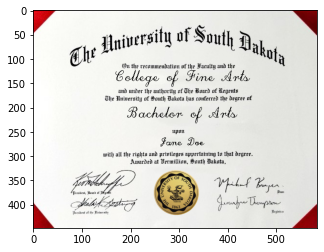

In [3]:
# Iterate through rows in the dataframe
for i, row in df.iterrows():
       
    # Get text fields from the current row
    name = row['First Name'] + ' ' + row['Last Name']
    school = row['School']
    degree = row['Degree']
      
    # Get the degree template
    img = cv.imread('DegreeTemplate.png')
    
    # Add Name, first and last
    font = cv.FONT_HERSHEY_SCRIPT_COMPLEX           
    font_size = 0.7
    font_color = (0,0,0)
    text_size = cv.getTextSize(name, font, font_size, 1)[0]   
    coordinate_y_adjustment = -45
    coordinate_x_adjustment = 15
    text_x = (img.shape[1] - text_size[0]) / 2 + coordinate_x_adjustment 
    text_y = (img.shape[0] + text_size[1]) / 2 - coordinate_y_adjustment
    text_x = int(text_x)
    text_y = int(text_y)
    cv.putText(img, name,
              (text_x ,text_y ), 
              font,
              font_size,
              font_color, 1) 
    
    # Add School
    font = cv.FONT_HERSHEY_SCRIPT_COMPLEX           
    font_size = 1
    font_color = (0,0,0)
    text_size = cv.getTextSize(school, font, font_size, 1)[0]  
    coordinate_y_adjustment = 90
    coordinate_x_adjustment = 15
    text_x = (img.shape[1] - text_size[0]) / 2 + coordinate_x_adjustment 
    text_y = (img.shape[0] + text_size[1]) / 2 - coordinate_y_adjustment
    text_x = int(text_x)
    text_y = int(text_y)
    cv.putText(img, school,
              (text_x ,text_y ), 
              font,
              font_size,
              font_color, 1)
    
    # Add Degree
    font = cv.FONT_HERSHEY_SCRIPT_COMPLEX           
    font_size = 1
    font_color = (0,0,0)
    text_size = cv.getTextSize(degree, font, font_size, 1)[0]  
    coordinate_y_adjustment = 15
    coordinate_x_adjustment = 15
    text_x = (img.shape[1] - text_size[0]) / 2 + coordinate_x_adjustment 
    text_y = (img.shape[0] + text_size[1]) / 2 - coordinate_y_adjustment
    text_x = int(text_x)
    text_y = int(text_y)
    cv.putText(img, degree,
              (text_x ,text_y ), 
              font,
              font_size,
              font_color, 1)
   
    # Add USD's seal
    seal = cv.imread('USDSeal.png', -1)
    seal = cv.resize(seal, (0, 0), fx=0.5, fy=0.5)
    x_offset=240
    y_offset=320  
    y1, y2 = y_offset, y_offset + seal.shape[0]
    x1, x2 = x_offset, x_offset + seal.shape[1]
    alpha_s = seal[:, :, 3] / 255.0
    alpha_l = 1.0 - alpha_s
    for c in range(0, 3):
        img[y1:y2, x1:x2, c] = (alpha_s * seal[:, :, c] + alpha_l * img[y1:y2, x1:x2, c])
        
    # Show and Save the certificate
    plt.figure()
    plt.imshow(img[...,::-1])
    cv.imwrite('Certificates/certi'+str(i)+'.png',img)